In [1]:
from os import walk, path
from tensorflow import keras
import json
from IPython.display import Image, display
from time import sleep
import matplotlib.pyplot as plt


models_dir = "./models"

In [ ]:
models_dirs = []

for root, dirs, _ in walk(models_dir, topdown=True):
    for dir in dirs:
        models_dirs.append(path.join(root, dir))

print(models_dirs)

models = []
for dir in models_dirs:
    tmp_dict = {"name": dir.split('/')[-1], "model": "", "history": "", "pic": ""}
    for root, _, files in walk(dir):
        for file in files:
            name, ext = file.split('.')

            if ext == "h5":
                pass
                # tmp_dict["model"] = keras.models.load_model(path.join(root, file))
            elif ext == "png":
                tmp_dict["pic"] = Image(filename=path.join(root, file)) 
            elif ext == "bk":
                tmp_dict["history"] = json.load(open(path.join(root, file), 'r'))
                

    models.append(tmp_dict)

# print(models)

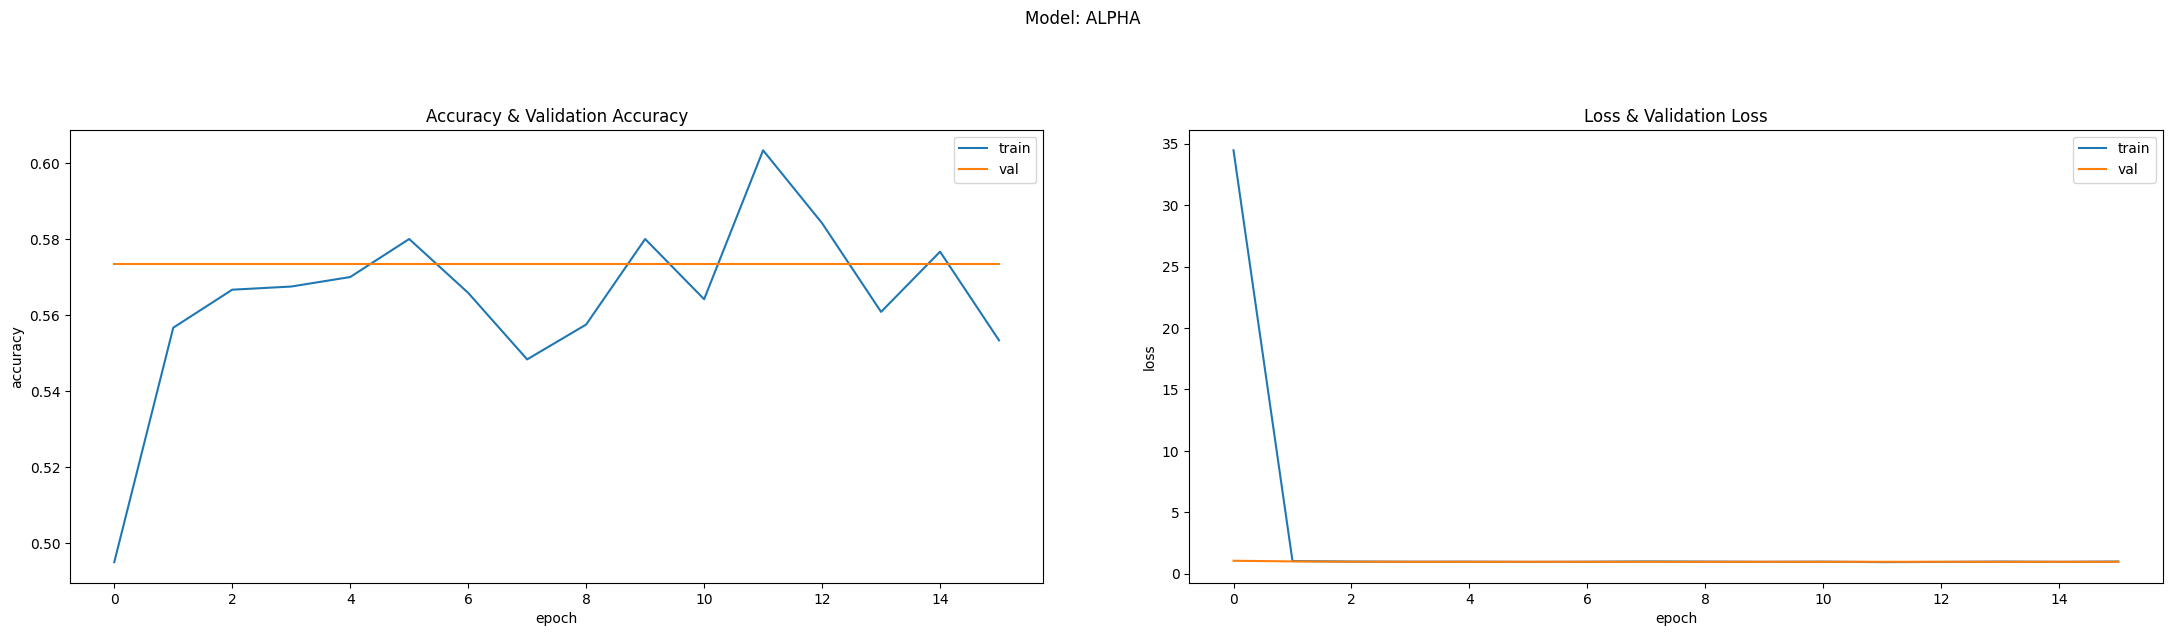

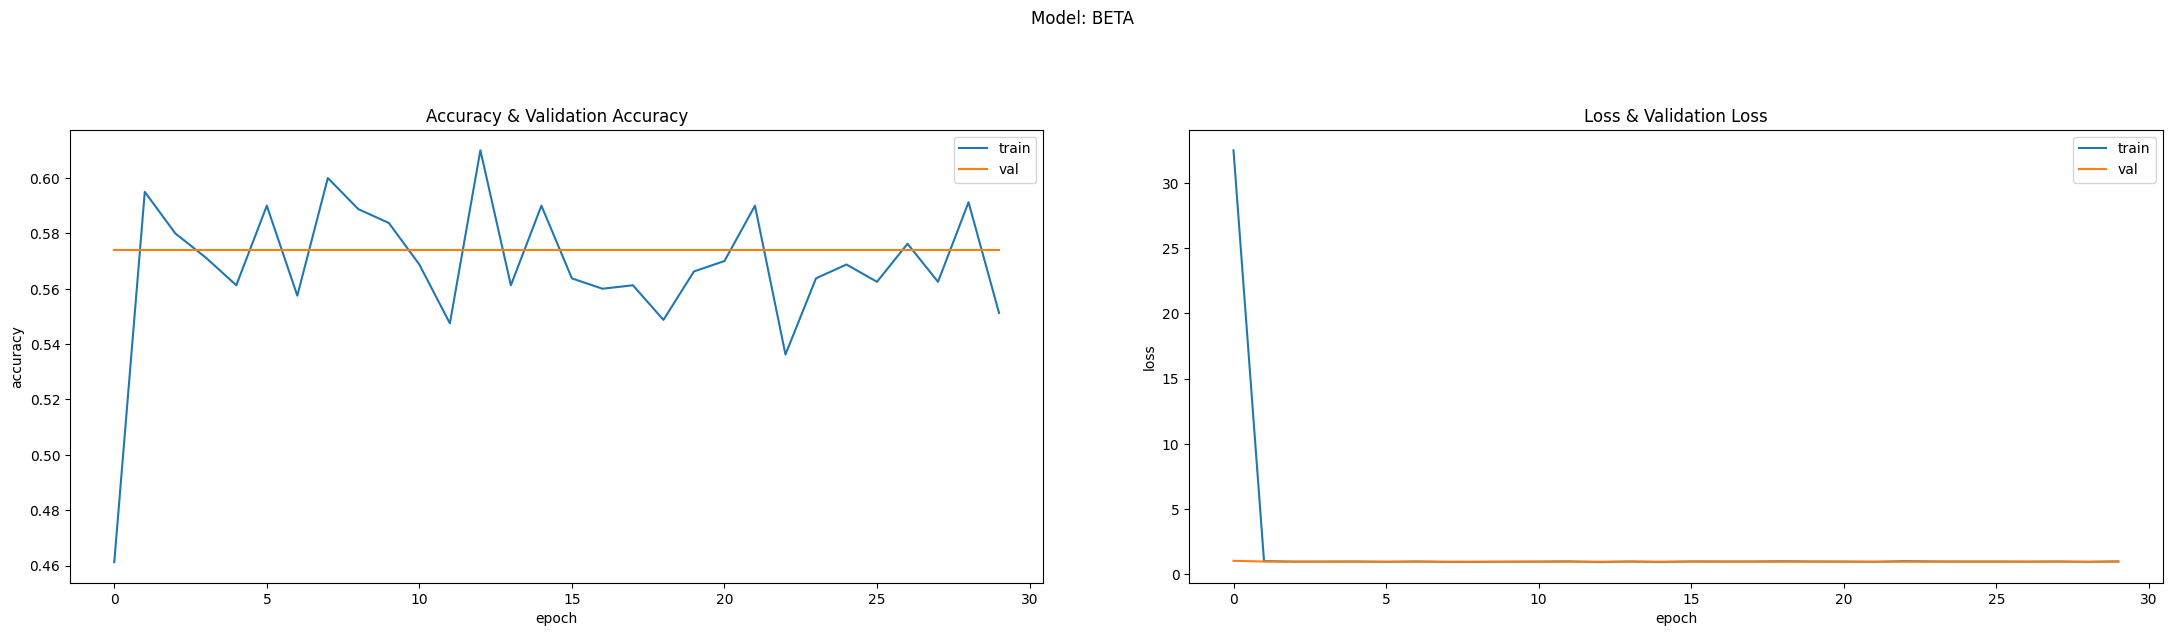

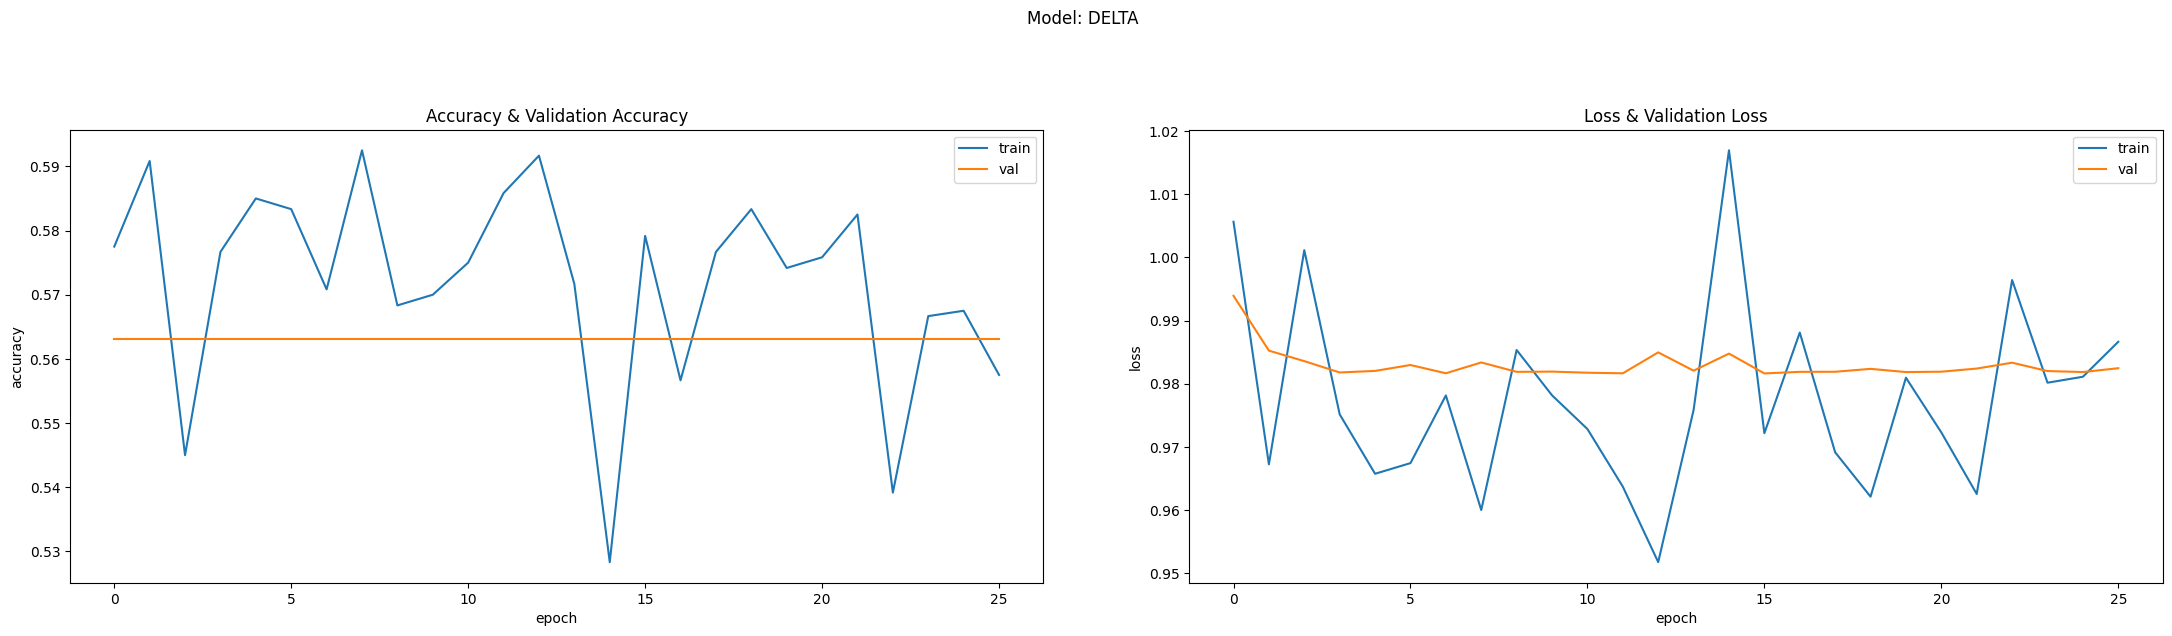

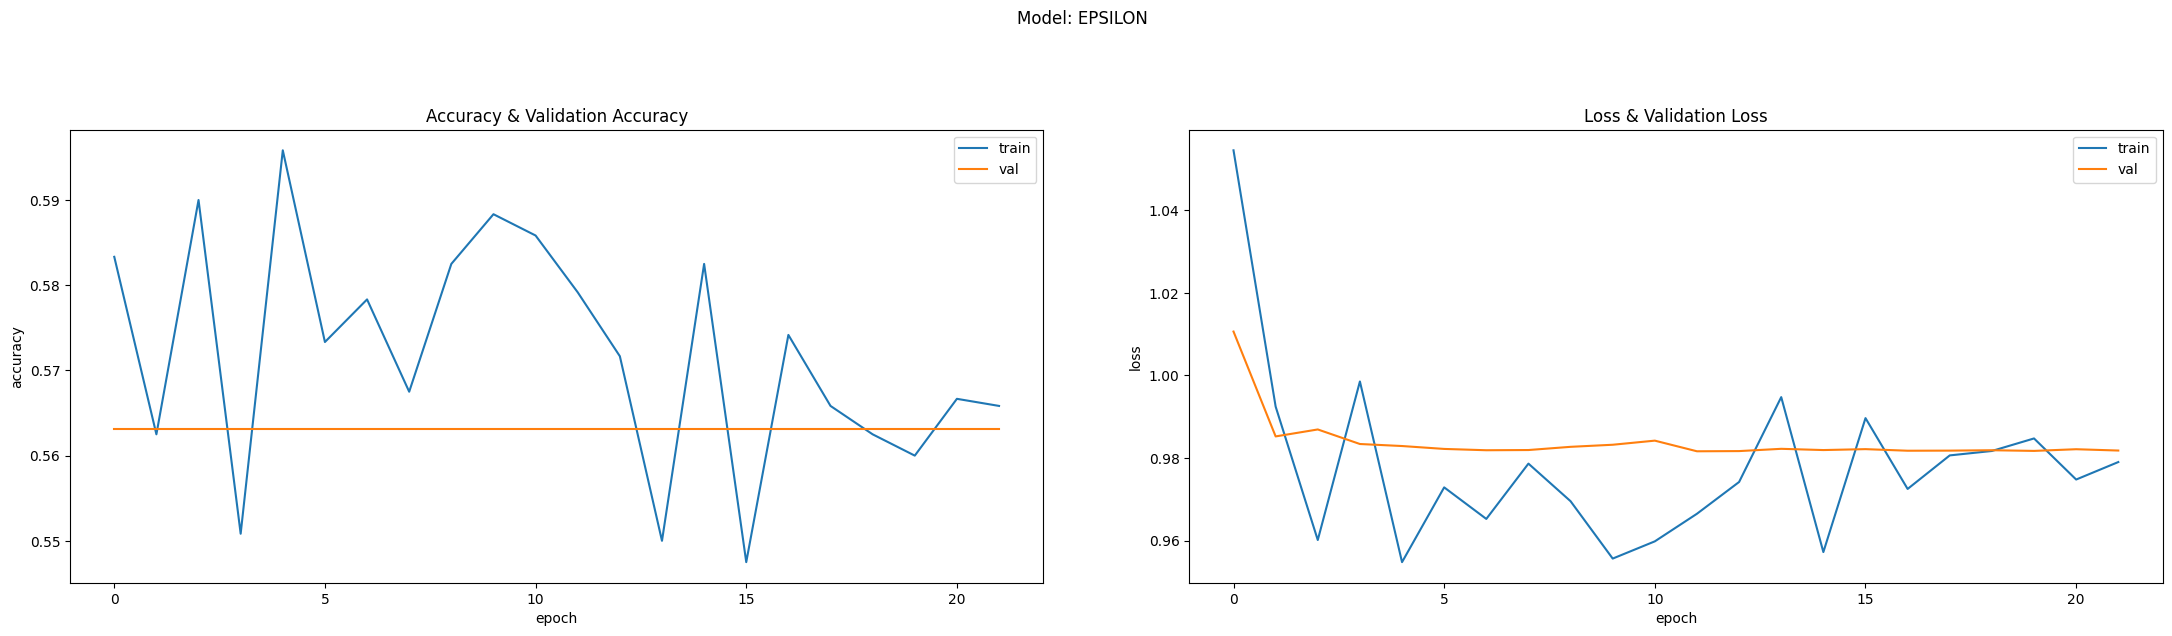

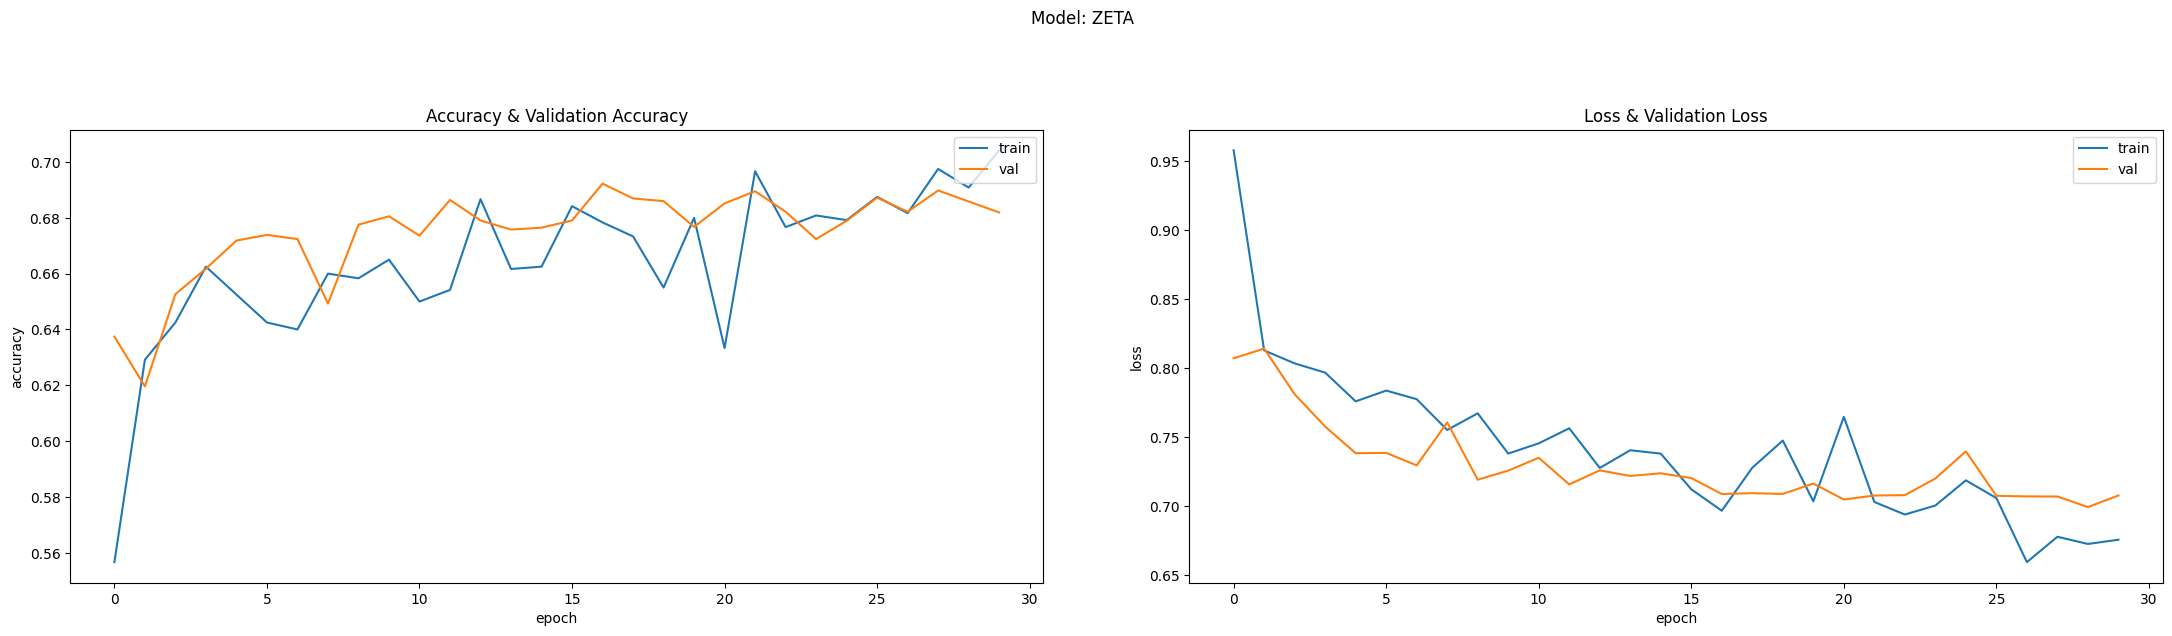

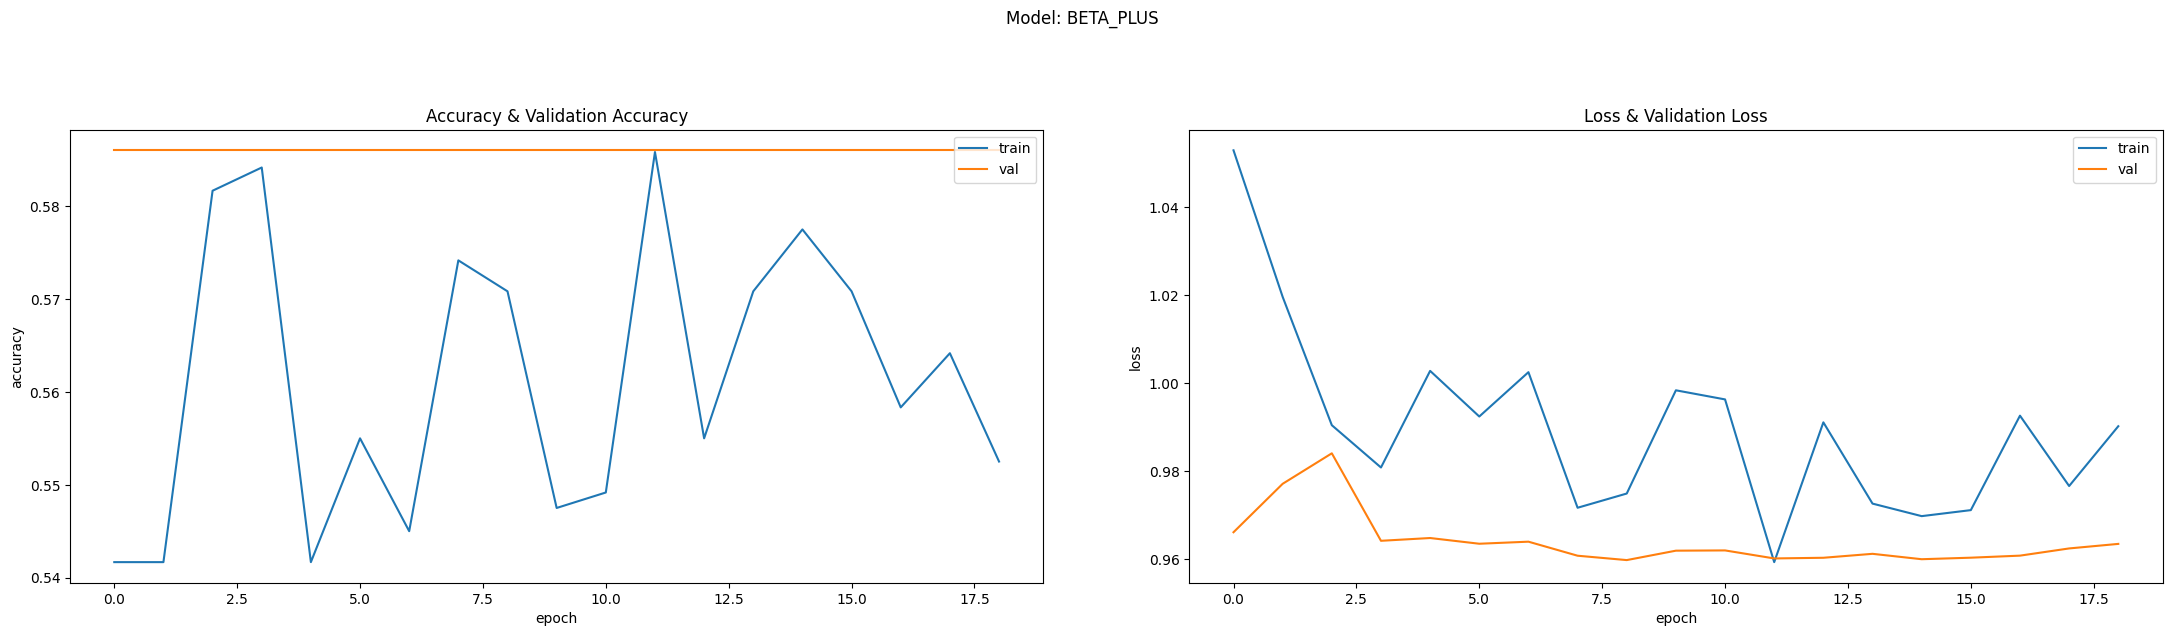

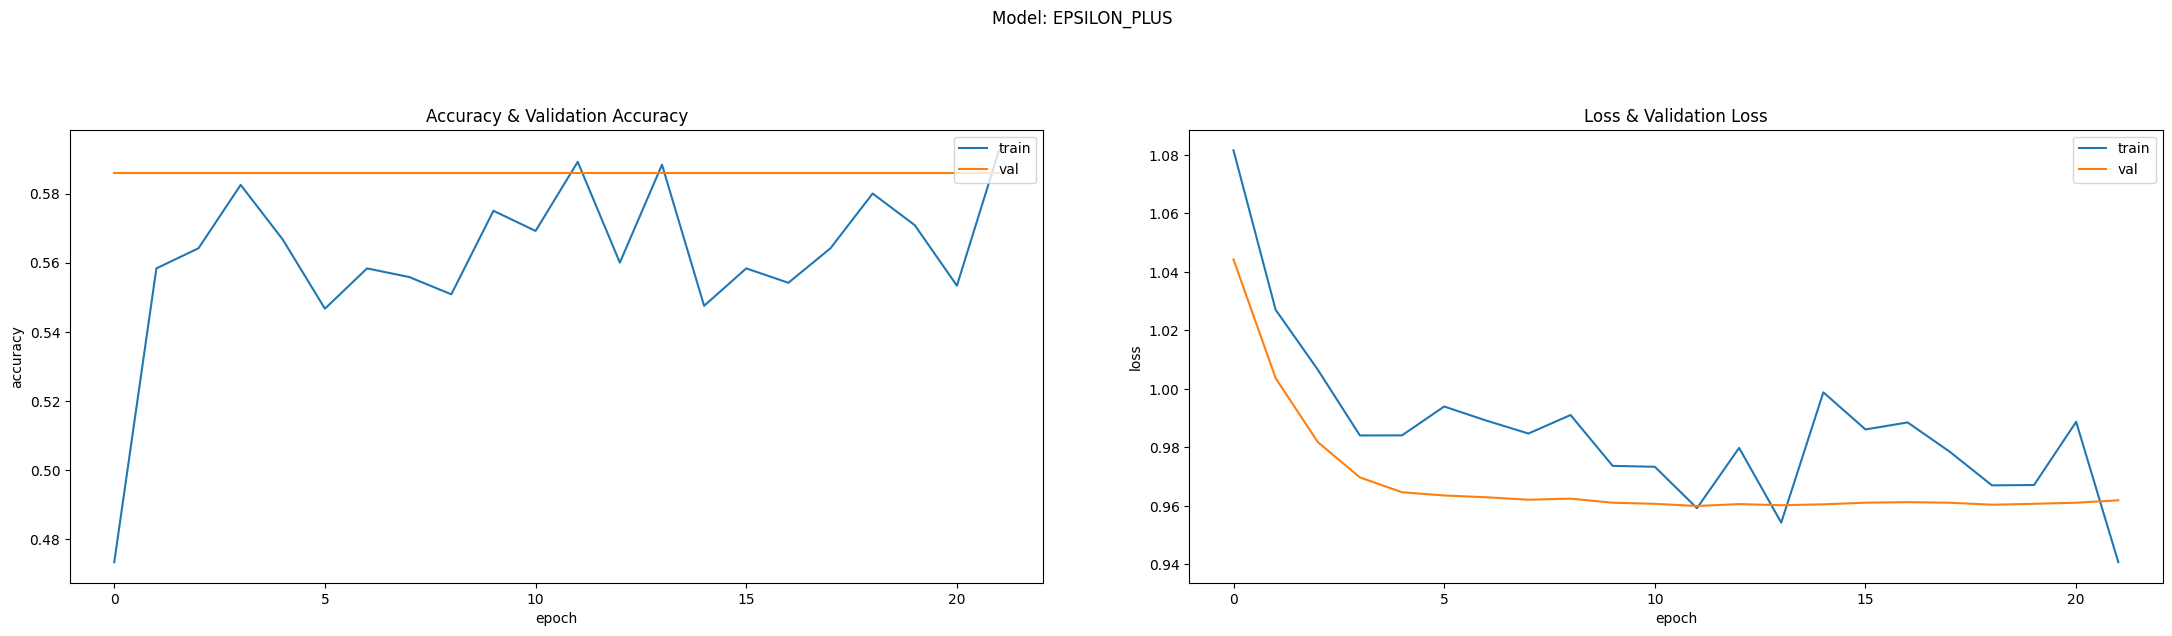

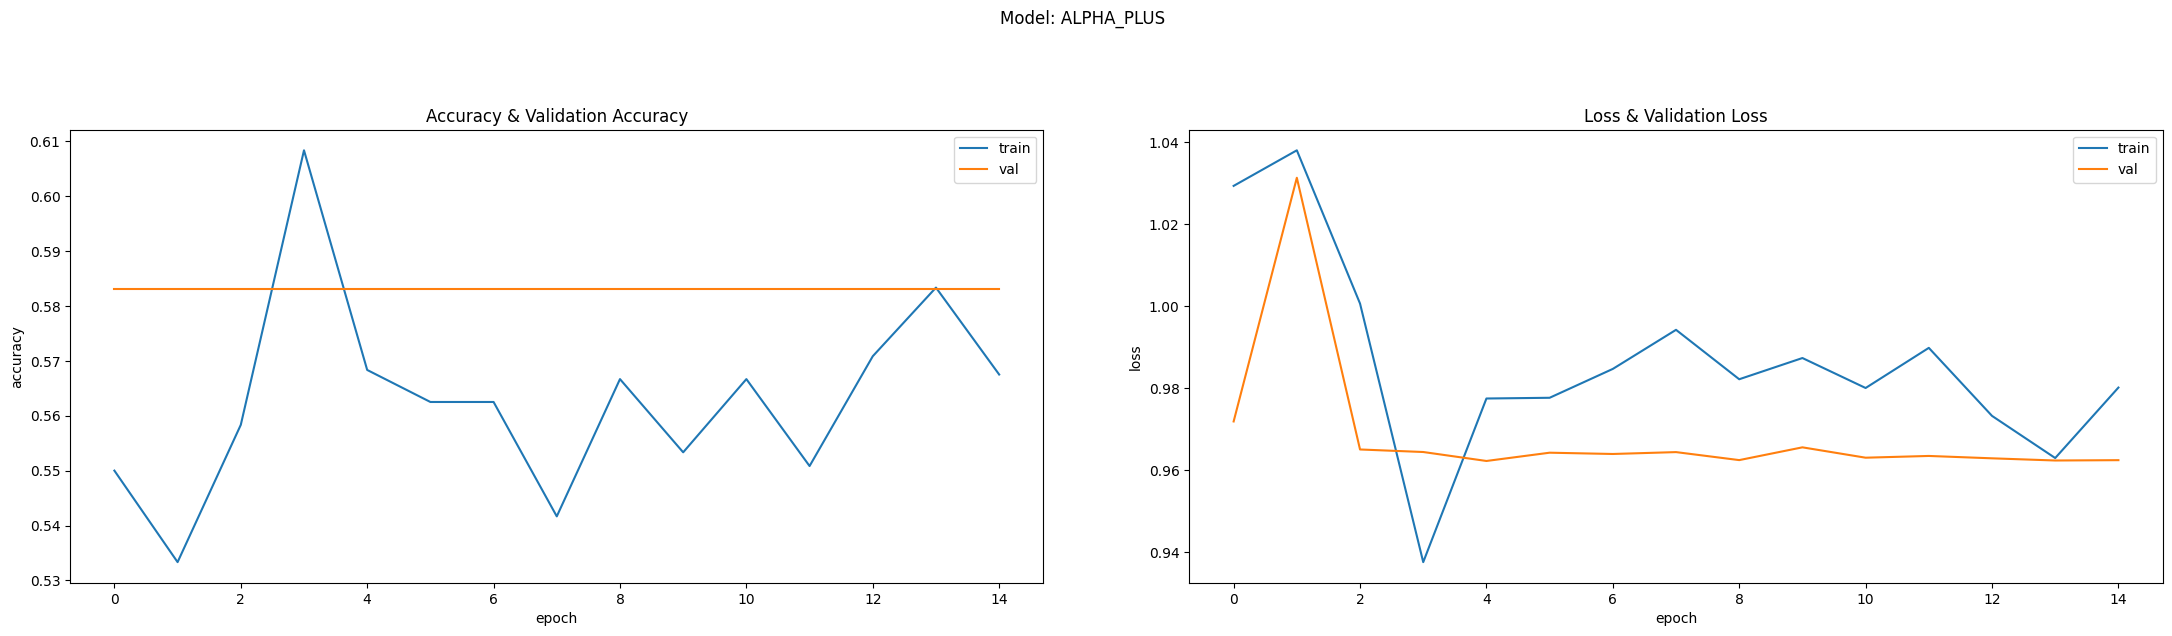

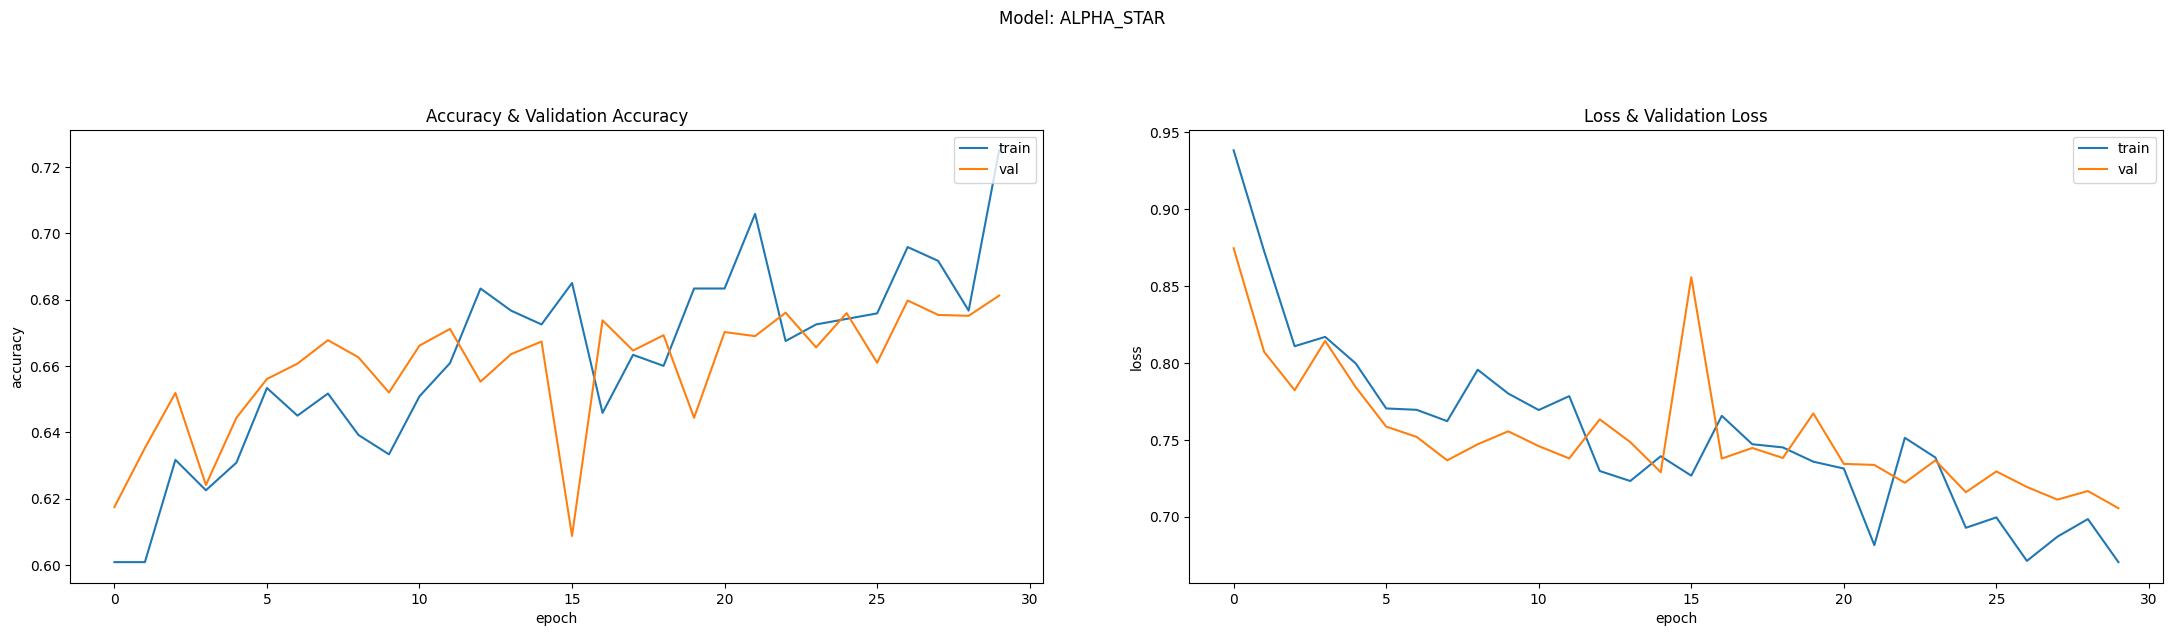

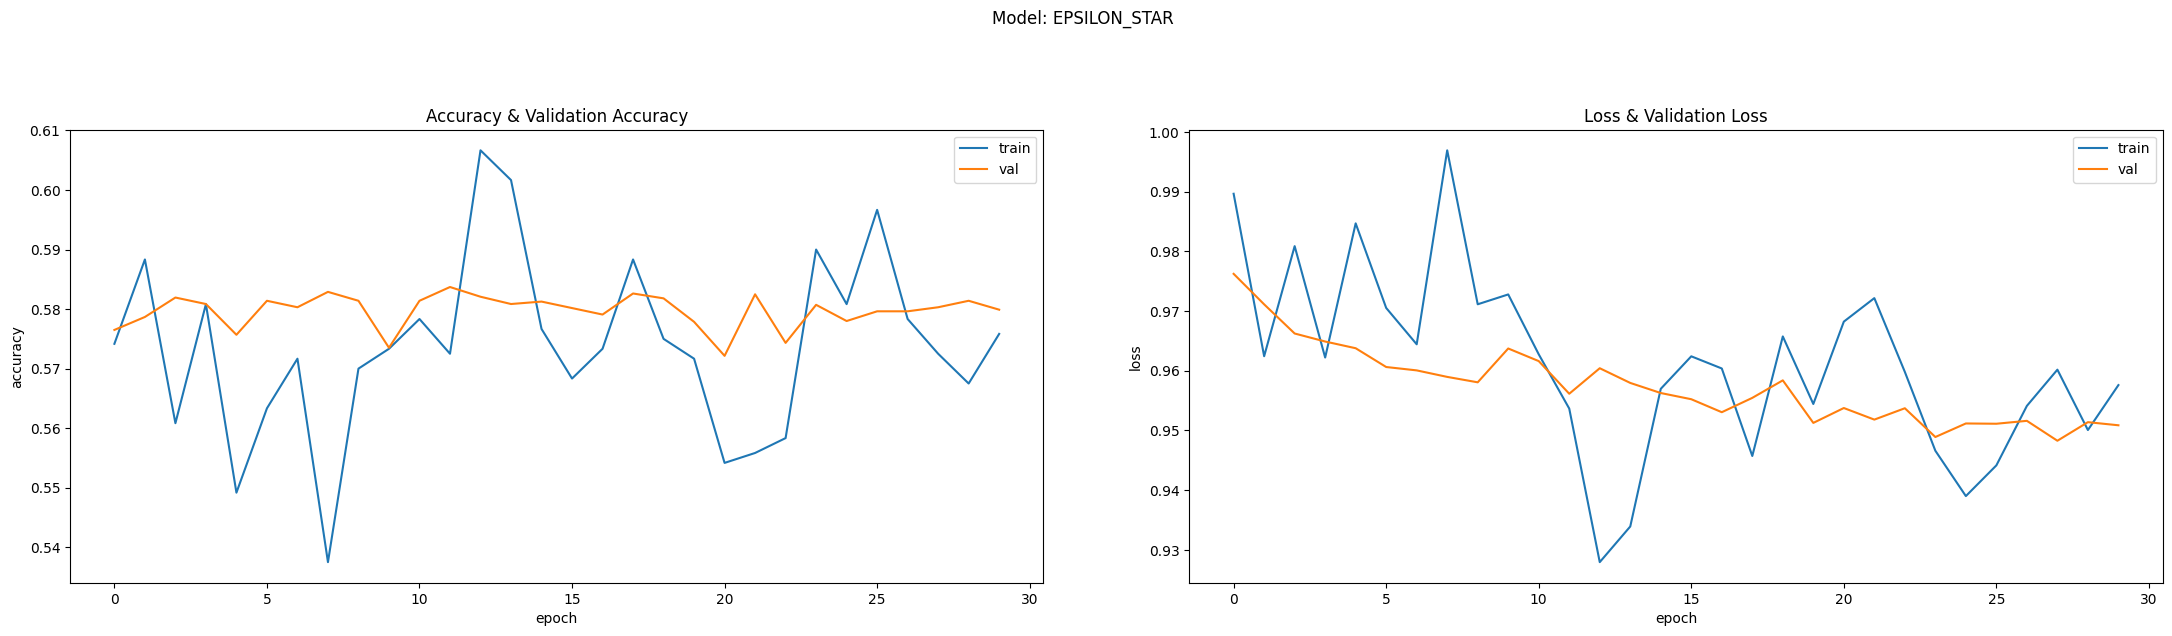

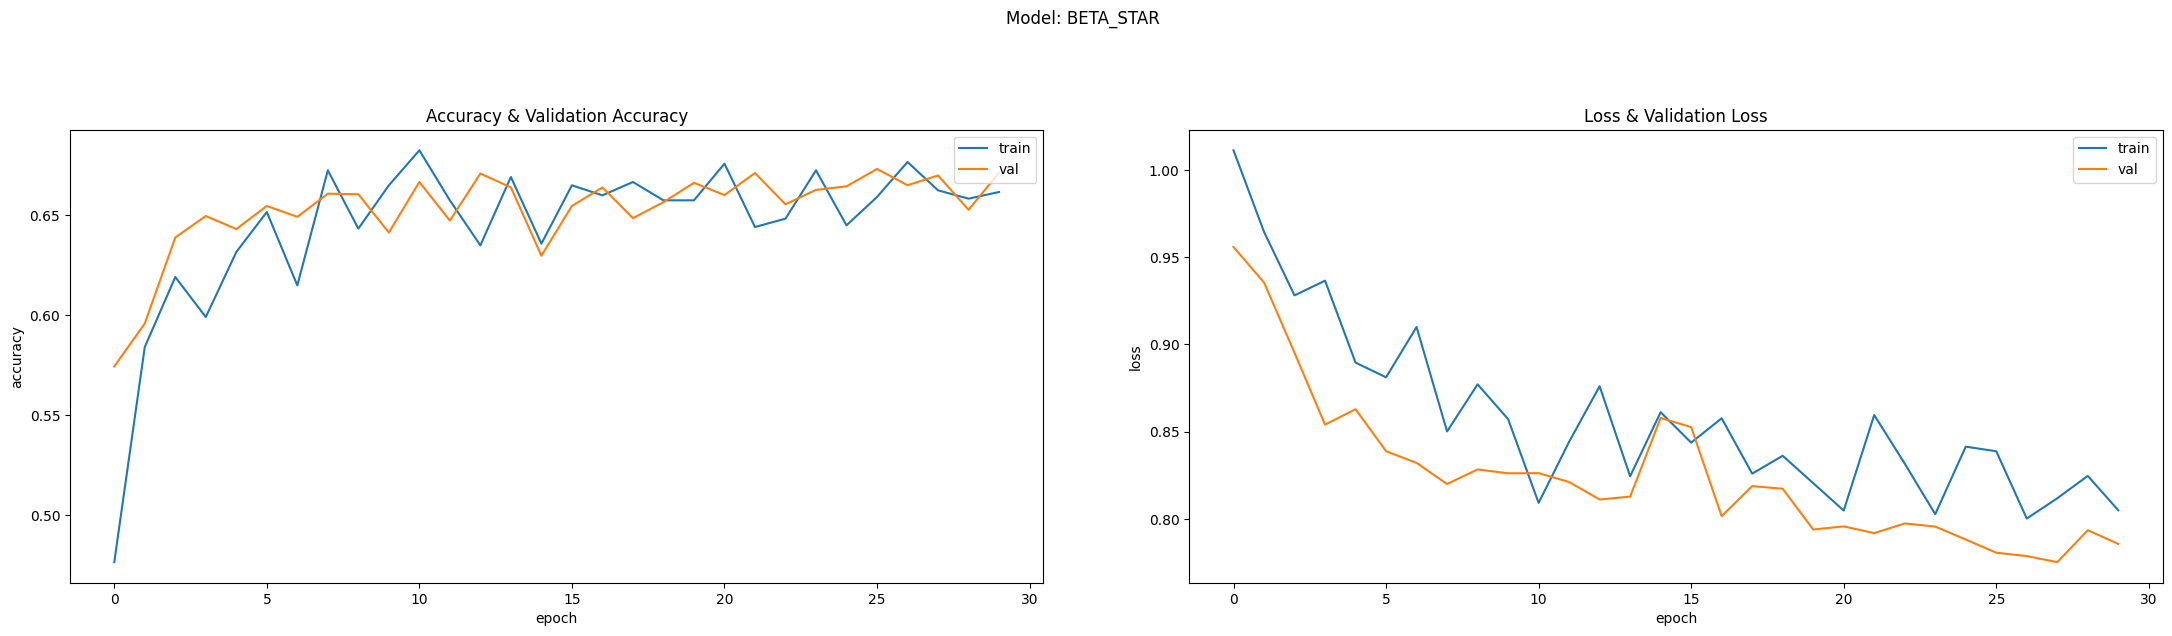

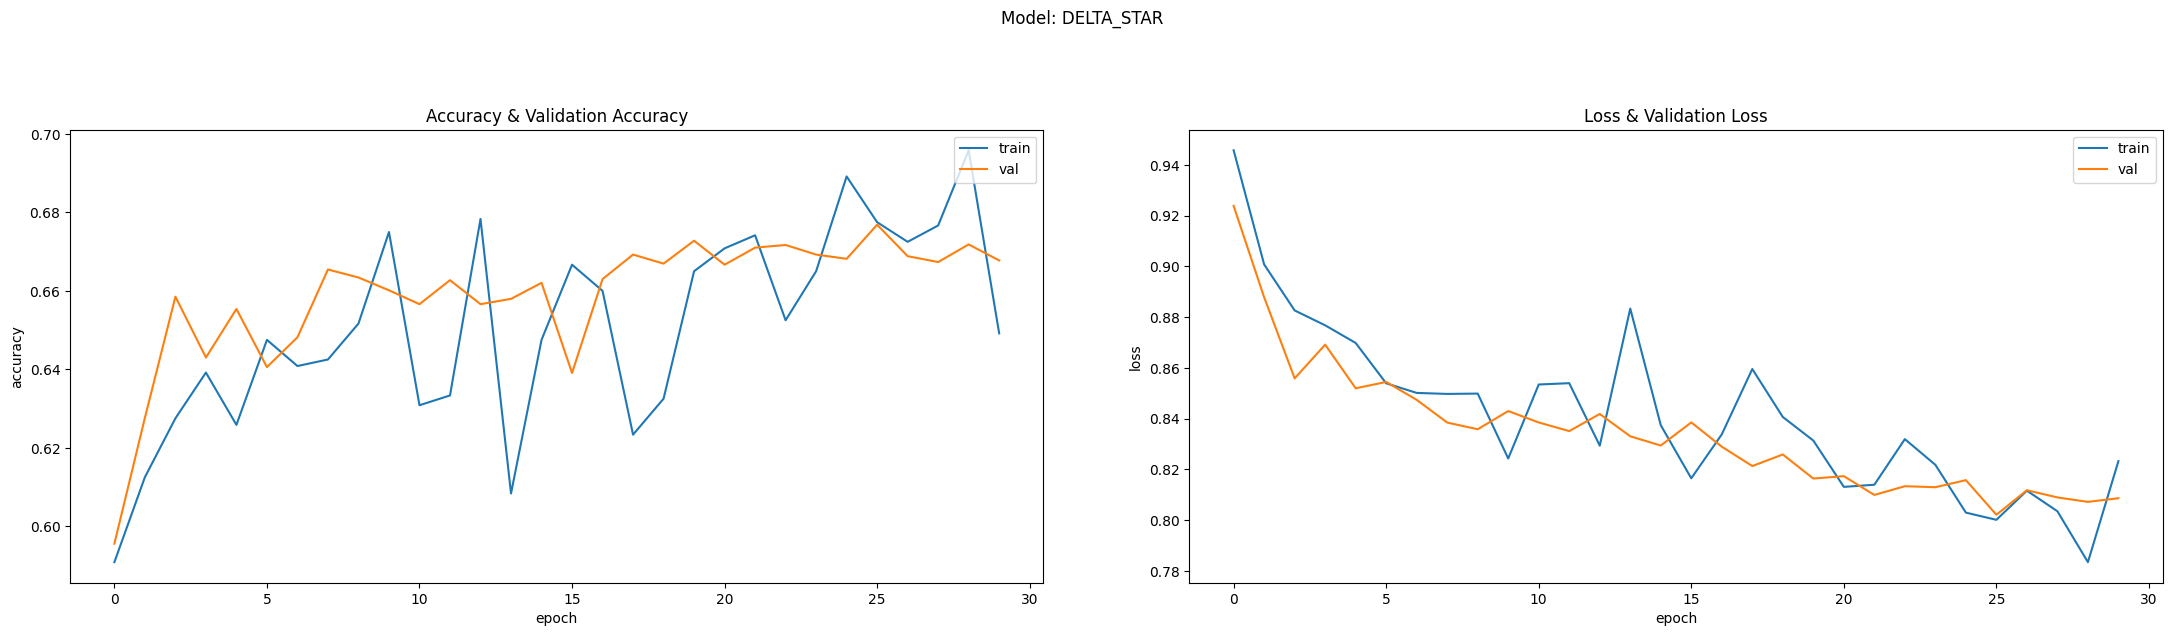

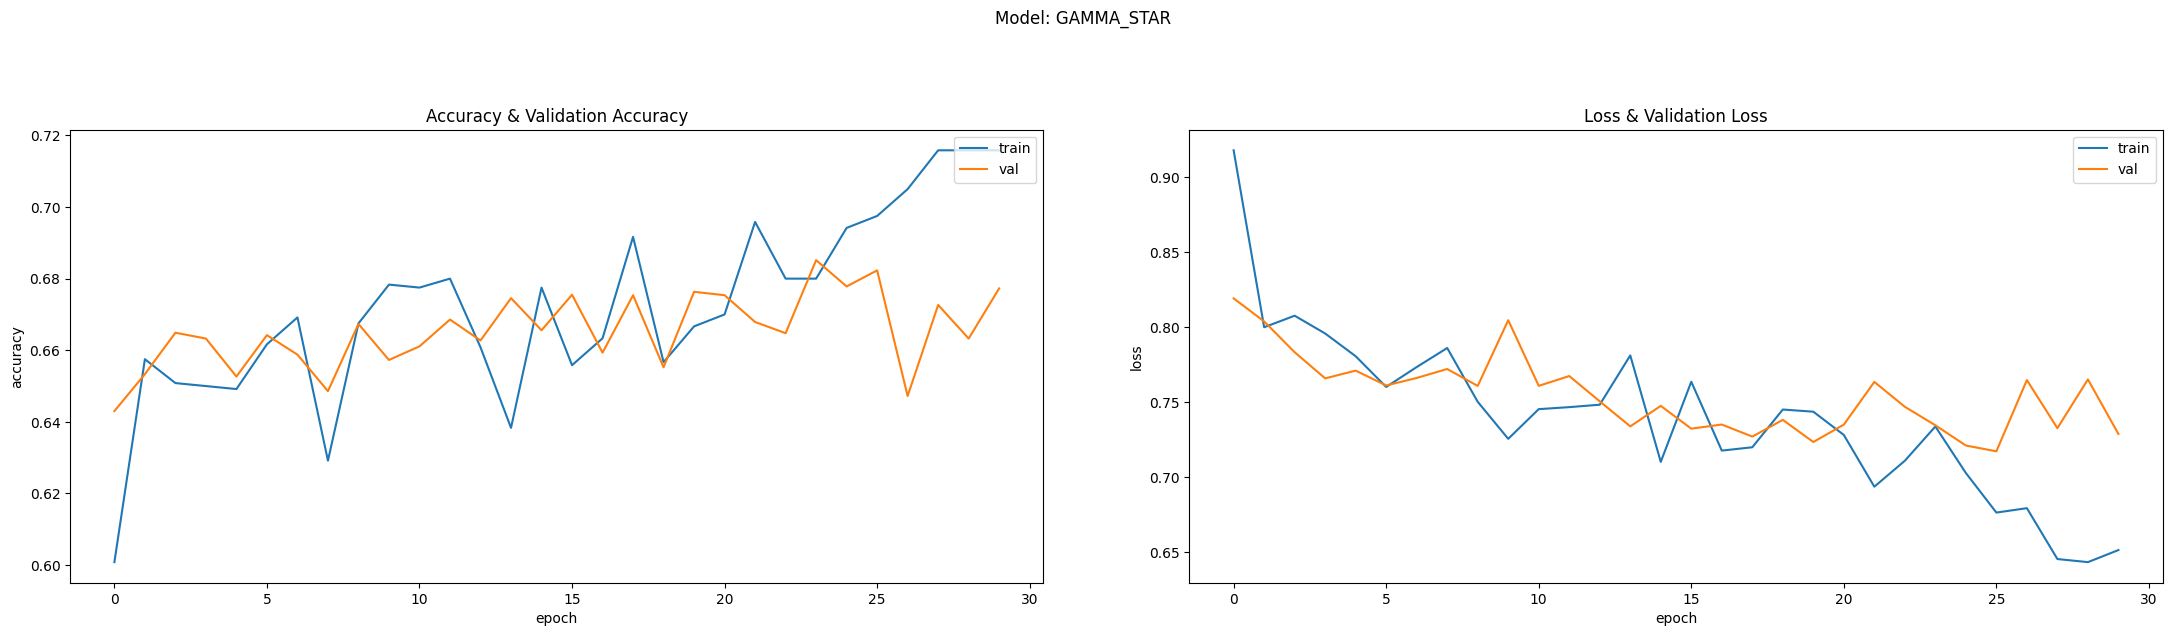

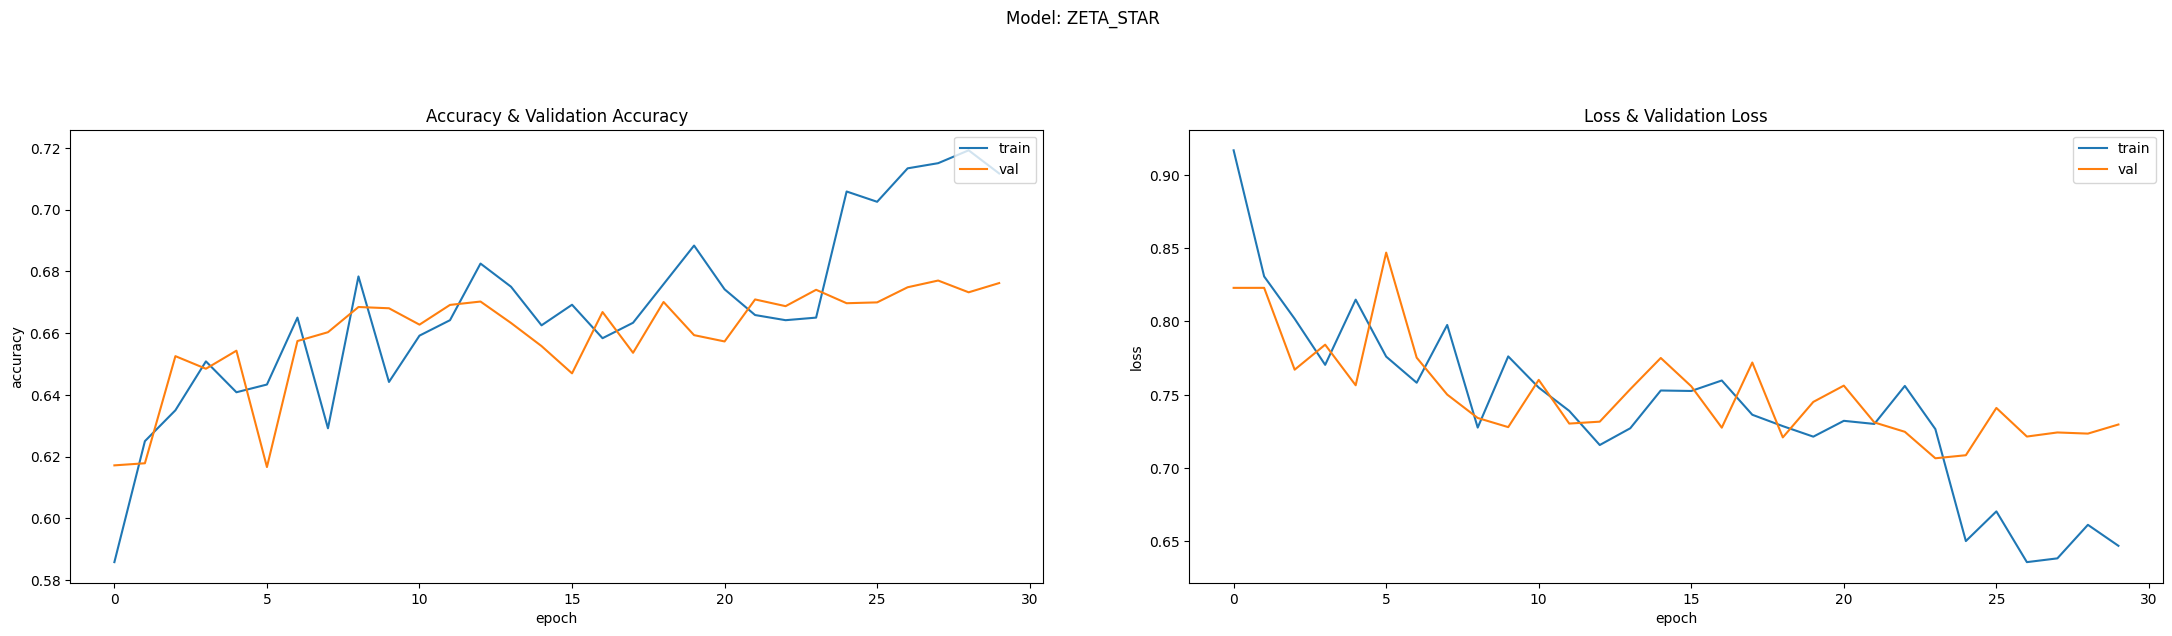

In [3]:
for model in models:
    history = model["history"]

    if history is None or history == '': continue
    
    fig, axes = plt.subplots(1, 2, figsize=(27, 6), dpi=100)

    axes[0].plot(history['accuracy'])
    axes[0].plot(history['val_accuracy'])
    axes[0].set(xlabel='epoch', ylabel='accuracy', title="Accuracy & Validation Accuracy")
    axes[0].legend(['train', 'val'], loc='upper right')

    axes[1].plot(history['loss'])
    axes[1].plot(history['val_loss'])
    axes[1].set(xlabel='epoch', ylabel='loss', title="Loss & Validation Loss")
    axes[1].legend(['train', 'val'], loc='upper right')

    fig.suptitle(f'Model: {model["name"].upper()}', y=1.08)
    fig.subplots_adjust(
        wspace=0.15, 
        #left=0.1, bottom=0.1, right=0.9, top=0.9, hspace=0.4
    )

    plt.show()

In [4]:
# sorting models by val_accuracy
def sort_by_valacc(e):
    history = e["history"]

    if history is None or history == '': return 0

    val_acc = history["val_accuracy"][-1]
    return float(val_acc)

models.sort(key=sort_by_valacc)


""" for model in models:
    history = model["history"]

    if history is None or history == '': continue

    print(f'{model["name"]}: {model["history"]["val_accuracy"][-1]} val_acc') """

delta: 0.5631715059280396 val_acc
epsilon: 0.5631715059280396 val_acc
alpha: 0.573371410369873 val_acc
beta: 0.573915421962738 val_acc
epsilon_star: 0.5798993706703186 val_acc
alpha_plus: 0.583163321018219 val_acc
beta_plus: 0.5860193371772766 val_acc
epsilon_plus: 0.5860193371772766 val_acc
delta_star: 0.6677546501159668 val_acc
beta_star: 0.6712906360626221 val_acc
zeta_star: 0.6761865615844727 val_acc
gamma_star: 0.6772745847702026 val_acc
alpha_star: 0.6812185645103455 val_acc
zeta: 0.6818985342979431 val_acc


In [9]:
for model in models:
    history = model["history"]

    if history is None or history == '': continue
    # if "star" not in model["name"]: continue
    
    print(f"Name: {model['name']}")
    
    print(f"Acc: {model['history']['accuracy'][-1]} / Val Acc: {model['history']['val_accuracy'][-1]}")
    print(f"Loss: {model['history']['loss'][-1]} / Val Loss: {model['history']['val_loss'][-1]}")
    # display(model['pic'])

    print("")
    sleep(.01)   # for sync the print with display

Name: delta
Acc: 0.5575000047683716 / Val Acc: 0.5631715059280396
Loss: 0.9866357445716858 / Val Loss: 0.9824467897415161

Name: epsilon
Acc: 0.565833330154419 / Val Acc: 0.5631715059280396
Loss: 0.9790074825286865 / Val Loss: 0.9817951321601868

Name: alpha
Acc: 0.5533333420753479 / Val Acc: 0.573371410369873
Loss: 0.9913673996925354 / Val Loss: 0.9713249206542969

Name: beta
Acc: 0.5512499809265137 / Val Acc: 0.573915421962738
Loss: 0.9936825037002563 / Val Loss: 0.9716423749923706

Name: epsilon_star
Acc: 0.5758333206176758 / Val Acc: 0.5798993706703186
Loss: 0.9575889110565186 / Val Loss: 0.9508587121963501

Name: alpha_plus
Acc: 0.5674999952316284 / Val Acc: 0.583163321018219
Loss: 0.9801963567733765 / Val Loss: 0.9624821543693542

Name: beta_plus
Acc: 0.5525000095367432 / Val Acc: 0.5860193371772766
Loss: 0.9902079105377197 / Val Loss: 0.9634677171707153

Name: epsilon_plus
Acc: 0.5924999713897705 / Val Acc: 0.5860193371772766
Loss: 0.940758466720581 / Val Loss: 0.961906254291534

In [6]:
""" for model in models:
    print(f"Name: {model['name']}")
    display(model["pic"])
    # print(f"Pic: {model['pic']}")
    # print(f"{model['history']}")
    # print(model["model"])
    print("")
    sleep(.01)   # for sync the print with display """

' for model in models:\n    print(f"Name: {model[\'name\']}")\n    display(model["pic"])\n    # print(f"Pic: {model[\'pic\']}")\n    # print(f"{model[\'history\']}")\n    # print(model["model"])\n    print("")\n    sleep(.01)   # for sync the print with display '